In [1]:
#Library imports here, will add as we go.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
import time
from sklearn.feature_extraction.text import TfidfVectorizer



In [2]:
#Lots of data, let's bring them in separately and take a quick look.
aisles = pd.read_csv(f"/Users/ryanm/Desktop/aisles.csv")
aisles.info()
aisles.isnull().sum()
aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [3]:
depts = pd.read_csv(f"/Users/ryanm/Desktop/departments.csv")
depts.info()
depts.isnull().sum()
depts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [4]:
orders = pd.read_csv(f"/Users/ryanm/Desktop/orders.csv")
orders.info()
orders.isnull().sum()
orders.head()
orders.eval_set.value_counts()
# This feature has a number of nan values, however since they are all at the beginning of the column and are in the days_since_prior_order column we can assert that there would not be any value to enter there, so we will leave for now since the rest of the information is still good.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [5]:
prods = pd.read_csv(f"/Users/ryanm/Desktop/products.csv")
prods.info()
prods.isnull().sum()
prods.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
ord_prior = pd.read_csv(f"/Users/ryanm/Desktop/order_products__prior.csv")
ord_prior.info()
ord_prior.isnull().sum()
ord_prior.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
ord_train = pd.read_csv(f"/Users/ryanm/Desktop/order_products__train.csv")
ord_train.info()
ord_train.isnull().sum()
ord_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


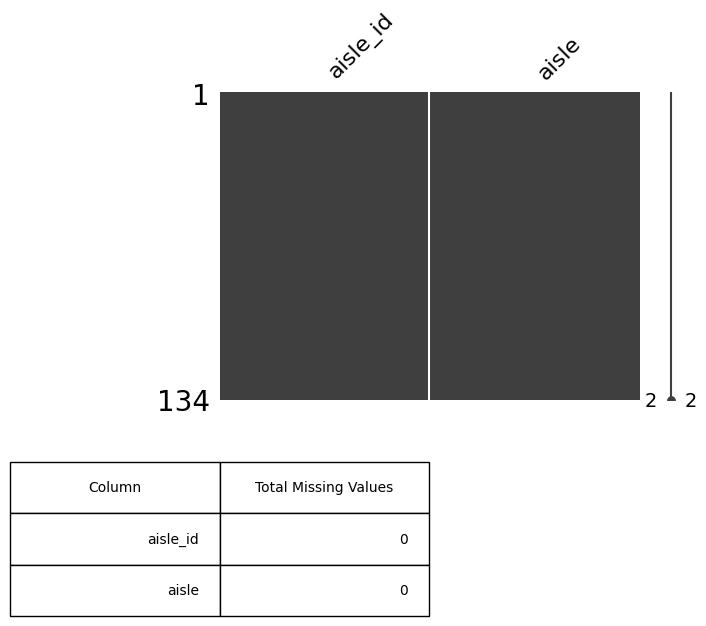

In [8]:
#Plot missingno matrices for each dataset to view and confirm missing values.
def add_totals(matrix):
    totals = matrix.isnull().sum()
    table = pd.DataFrame({'Column': totals.index, 'Total Missing Values' : totals.values})
    plt.table(cellText = table.values, colLabels=table.columns, loc = 'bottom', bbox=(-0.5, -0.7, 1, 0.5))

msno.matrix(aisles, figsize = (6,4))
add_totals(aisles)
plt.show()

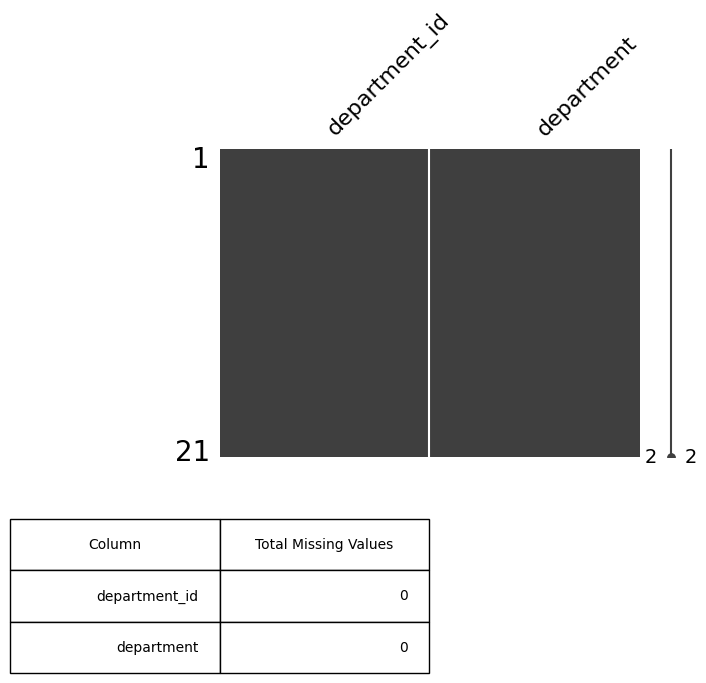

In [9]:

def add_totals(matrix):
    totals = matrix.isnull().sum()
    table = pd.DataFrame({'Column': totals.index, 'Total Missing Values' : totals.values})
    plt.table(cellText = table.values, colLabels=table.columns, loc = 'bottom', bbox=(-0.5, -0.7, 1, 0.5))

msno.matrix(depts, figsize = (6,4))
add_totals(depts)
plt.show()

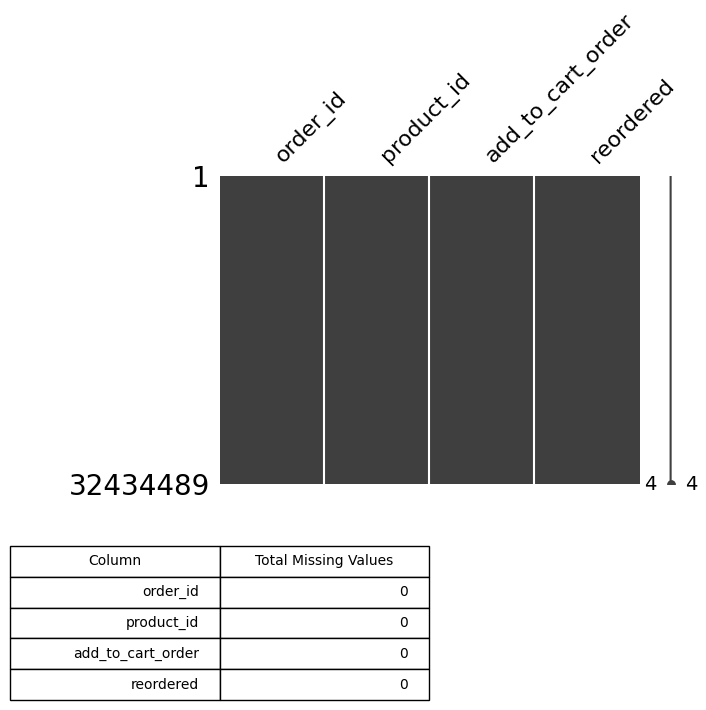

In [10]:
def add_totals(matrix):
    totals = matrix.isnull().sum()
    table = pd.DataFrame({'Column': totals.index, 'Total Missing Values' : totals.values})
    plt.table(cellText = table.values, colLabels=table.columns, loc = 'bottom', bbox=(-0.5, -0.7, 1, 0.5))

msno.matrix(ord_prior, figsize = (6,4))
add_totals(ord_prior)
plt.show()

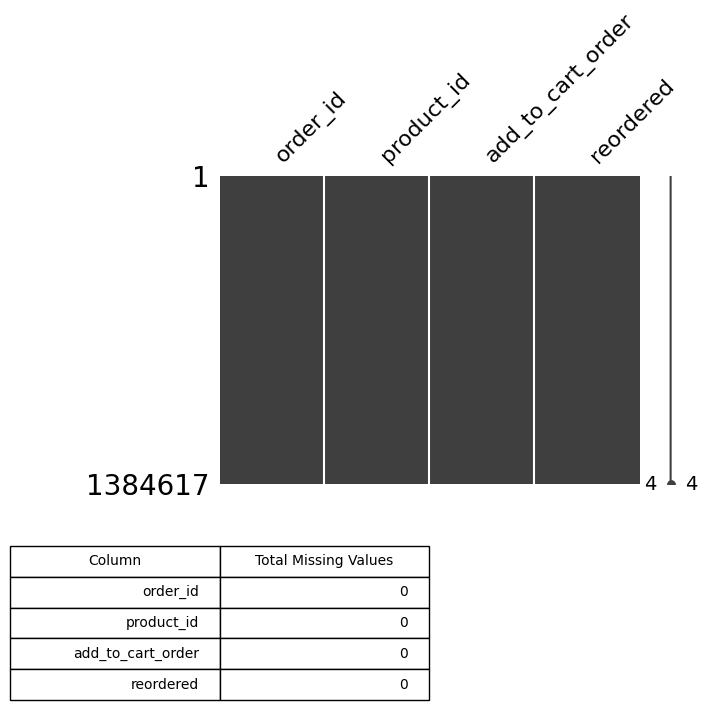

In [11]:
def add_totals(matrix):
    totals = matrix.isnull().sum()
    table = pd.DataFrame({'Column': totals.index, 'Total Missing Values' : totals.values})
    plt.table(cellText = table.values, colLabels=table.columns, loc = 'bottom', bbox=(-0.5, -0.7, 1, 0.5))

msno.matrix(ord_train, figsize = (6,4))
add_totals(ord_train)
plt.show()

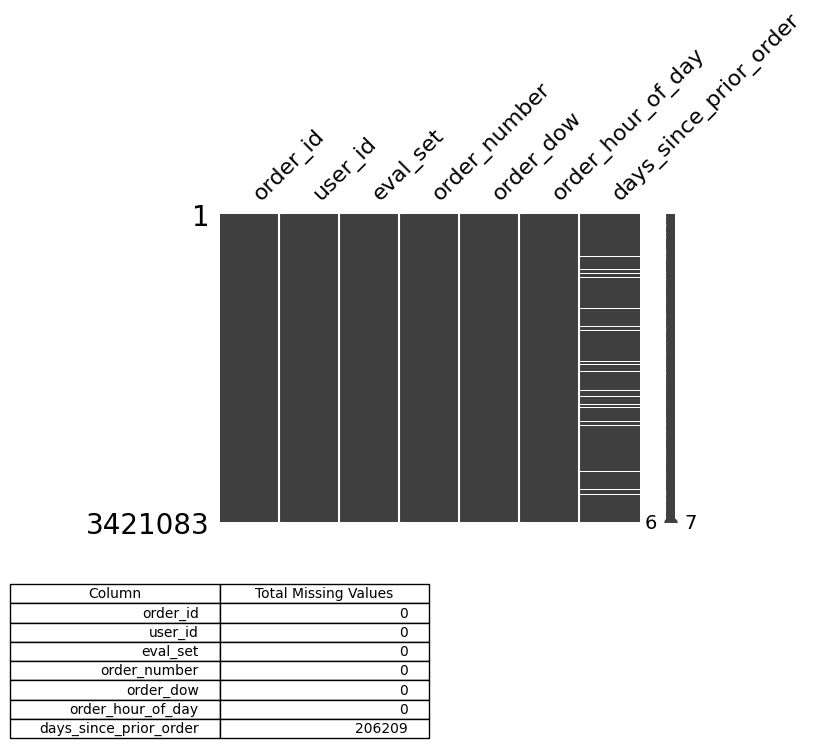

In [12]:
def add_totals(matrix):
    totals = matrix.isnull().sum()
    table = pd.DataFrame({'Column': totals.index, 'Total Missing Values' : totals.values})
    plt.table(cellText = table.values, colLabels=table.columns, loc = 'bottom', bbox=(-0.5, -0.7, 1, 0.5))

msno.matrix(orders, figsize = (6,4))
add_totals(orders)
plt.show()

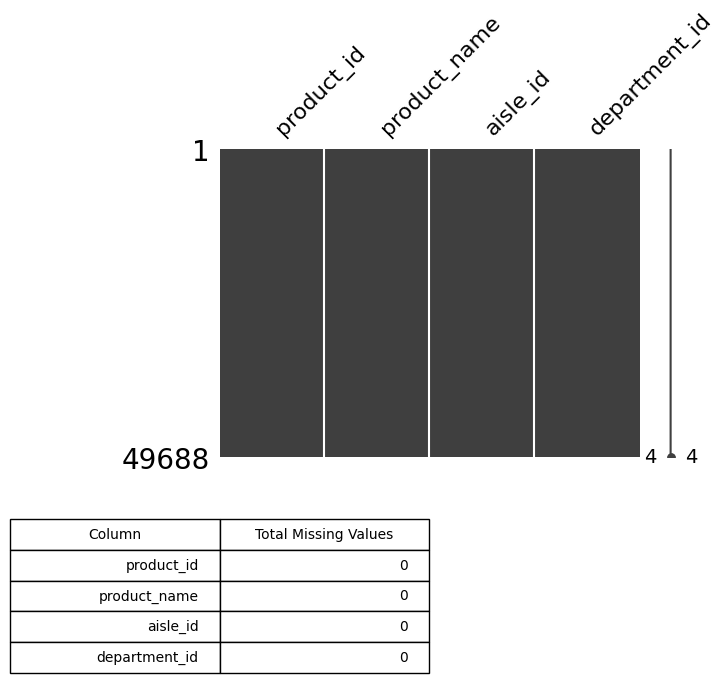

In [13]:
def add_totals(matrix):
    totals = matrix.isnull().sum()
    table = pd.DataFrame({'Column': totals.index, 'Total Missing Values' : totals.values})
    plt.table(cellText = table.values, colLabels=table.columns, loc = 'bottom', bbox=(-0.5, -0.7, 1, 0.5))

msno.matrix(prods, figsize = (6,4))
add_totals(prods)
plt.show()

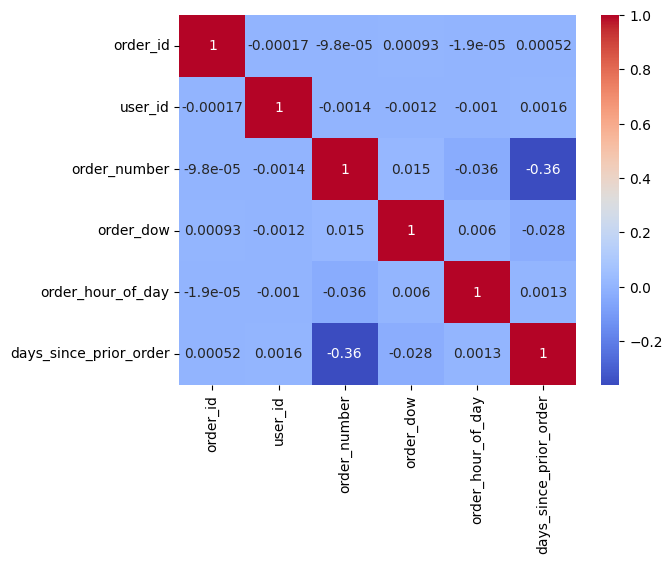

In [14]:
# Looks like there's some missing (nan) values in the orders df.  Let's take a look and see what we can do about those by imputing that column.
# Before we impute let's decide if we want to impute the whole df or just the subject column.
orders_corr = orders.corr()
sns.heatmap(orders_corr, annot = True, cmap = 'coolwarm')
plt.show()
# Cold as ice, we only will impute the subject column for the orders df.


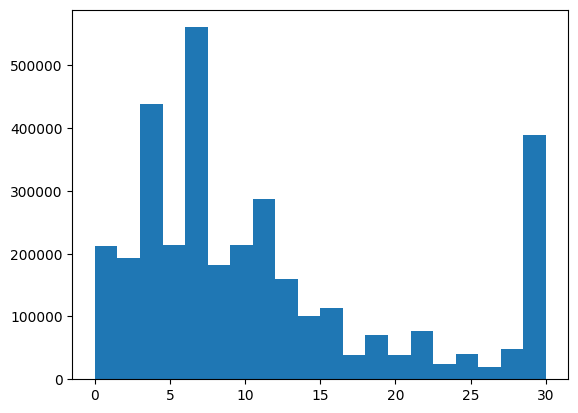

30.0    369323
7.0     320608
11.0    287179
6.0     240013
4.0     221696
3.0     217005
5.0     214503
2.0     193206
8.0     181717
1.0     145247
9.0     118188
14.0    100230
10.0     95186
13.0     83214
12.0     76146
0.0      67755
15.0     66579
16.0     46941
21.0     45470
17.0     39245
20.0     38527
18.0     35881
19.0     34384
22.0     32012
28.0     26777
23.0     23885
27.0     22013
24.0     20712
25.0     19234
29.0     19191
26.0     19016
Name: days_since_prior_order, dtype: int64

In [15]:
#let's start with just the mean, median, and mode imputations first.
orders_mean = orders['days_since_prior_order'].copy(deep = True)
mean_imputer = SimpleImputer(strategy = 'mean')
orders_mean = pd.Series(np.round(mean_imputer.fit_transform(orders[['days_since_prior_order']]).reshape(-1,),0), name = 'days_since_prior_order')

plt.hist(orders_mean.dropna(), bins = 20)
plt.show()
orders_mean.value_counts()
#orders_mean.isna().sum()


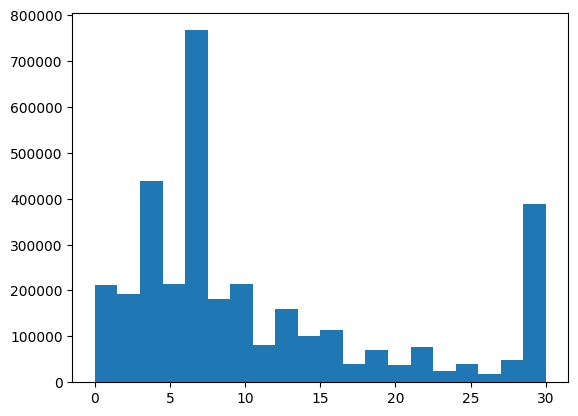

7.0     526817
30.0    369323
6.0     240013
4.0     221696
3.0     217005
5.0     214503
2.0     193206
8.0     181717
1.0     145247
9.0     118188
14.0    100230
10.0     95186
13.0     83214
11.0     80970
12.0     76146
0.0      67755
15.0     66579
16.0     46941
21.0     45470
17.0     39245
20.0     38527
18.0     35881
19.0     34384
22.0     32012
28.0     26777
23.0     23885
27.0     22013
24.0     20712
25.0     19234
29.0     19191
26.0     19016
Name: days_since_prior_order, dtype: int64

In [16]:
orders_median = orders['days_since_prior_order'].copy(deep = True)
median_imputer = SimpleImputer(strategy = 'median')
orders_median = pd.Series(np.round(median_imputer.fit_transform(orders[['days_since_prior_order']]).reshape(-1,),0), name = 'days_since_prior_order')

plt.hist(orders_median.dropna(), bins = 20)
plt.show()
orders_median.value_counts()
#orders_median.isna().sum()

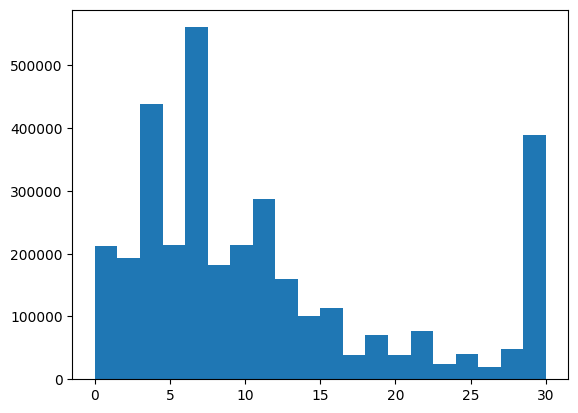

30.0    369323
7.0     320608
11.0    287179
6.0     240013
4.0     221696
3.0     217005
5.0     214503
2.0     193206
8.0     181717
1.0     145247
9.0     118188
14.0    100230
10.0     95186
13.0     83214
12.0     76146
0.0      67755
15.0     66579
16.0     46941
21.0     45470
17.0     39245
20.0     38527
18.0     35881
19.0     34384
22.0     32012
28.0     26777
23.0     23885
27.0     22013
24.0     20712
25.0     19234
29.0     19191
26.0     19016
Name: days_since_prior_order, dtype: int64

In [17]:
orders_mode = orders['days_since_prior_order'].copy(deep = True)
mode_imputer = SimpleImputer(strategy = 'most_frequent')
orders_mode = pd.Series(np.round(mean_imputer.fit_transform(orders[['days_since_prior_order']]).reshape(-1,),0), name = 'days_since_prior_order')

plt.hist(orders_mode.dropna(), bins = 20)
plt.show()
orders_mode.value_counts()
#orders_mode.isna().sum()

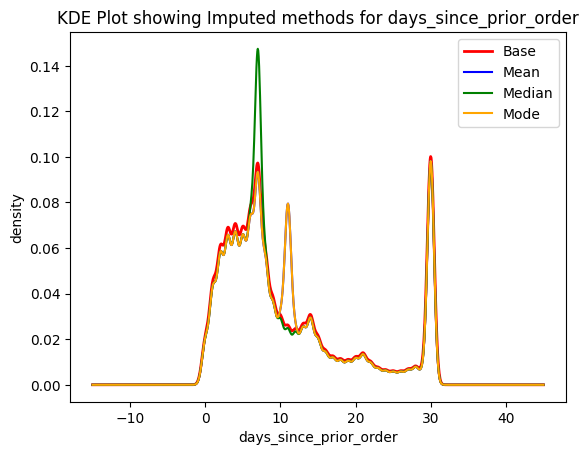

In [18]:
orders['days_since_prior_order'].plot(kind = 'kde', c = 'red', linewidth = 2)
orders_mean.plot(kind = 'kde', c = 'blue', linewidth = 1.5)
orders_median.plot(kind = 'kde', c = 'green', linewidth = 1.5)
orders_mode.plot(kind = 'kde', c = 'orange', linewidth = 1.5)
plt.gca().legend(labels = ['Base', 'Mean', 'Median', 'Mode'])
plt.gca().set_xlabel('days_since_prior_order')
plt.gca().set_ylabel('density')
plt.gca().set_title('KDE Plot showing Imputed methods for days_since_prior_order')
plt.show()

In [19]:
# Now that we now which method is the winner let's reassign our column back to orders.
orders['days_since_prior_order'] = orders_mean

In [61]:
# Let's make some quick merges and reorganize our data
order_prod = orders.merge(ord_prior, on = 'order_id', how = 'inner')
order_prod_grp = order_prod.groupby(['user_id', 'order_number'])
order_prod_final = order_prod_grp.max().reset_index()
order_prod_final.head(10)

main_df = order_prod_final
main_df.drop(columns = 'eval_set', inplace = True)
main_df.head(25)


,user_id,order_number,order_id,eval_set,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1,1,2539329,prior,2,8,11.0,26405,5,0
1,1,2,2398795,prior,3,7,15.0,26088,6,1
2,1,3,473747,prior,3,12,21.0,30450,5,1
3,1,4,2254736,prior,4,7,29.0,26405,5,1
4,1,5,431534,prior,4,15,28.0,41787,8,1
5,1,6,3367565,prior,2,7,19.0,25133,4,1
6,1,7,550135,prior,1,9,20.0,25133,5,1
7,1,8,3108588,prior,1,14,14.0,49235,6,1
8,1,9,2295261,prior,1,16,0.0,49235,6,1
9,1,10,2550362,prior,4,8,30.0,46149,9,1


In [62]:
prod_df = prods.merge(aisles, on = 'aisle_id', how = 'inner')
prod_df_dept = prod_df.merge(depts, on = 'department_id')
prod_df_dept_grp = prod_df_dept.groupby(['product_id', 'product_name'])
prod_df_dept_final = prod_df_dept_grp.max().reset_index()

sub_df = prod_df_dept_final
sub_df.head(10)

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
5,6,Dry Nose Oil,11,11,cold flu allergy,personal care
6,7,Pure Coconut Water With Orange,98,7,juice nectars,beverages
7,8,Cut Russet Potatoes Steam N' Mash,116,1,frozen produce,frozen
8,9,Light Strawberry Blueberry Yogurt,120,16,yogurt,dairy eggs
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,water seltzer sparkling water,beverages


In [71]:
df = main_df.merge(sub_df, on = 'product_id', how = 'inner')
df.head(10)

df_grp = df.groupby(['user_id', 'order_number', 'product_name'])
df_grp_sort = df_grp.max().reset_index()
df_grp_sort.head(25)

,user_id,order_number,product_name,order_id,eval_set,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,aisle,department
0,1,1,XL Pick-A-Size Paper Towel Rolls,2539329,prior,2,8,11.0,26405,5,0,54,17,paper goods,household
1,1,2,Aged White Cheddar Popcorn,2398795,prior,3,7,15.0,26088,6,1,23,19,popcorn jerky,snacks
2,1,3,Creamy Almond Butter,473747,prior,3,12,21.0,30450,5,1,88,13,spreads,pantry
3,1,4,XL Pick-A-Size Paper Towel Rolls,2254736,prior,4,7,29.0,26405,5,1,54,17,paper goods,household
4,1,5,Bartlett Pears,431534,prior,4,15,28.0,41787,8,1,24,4,fresh fruits,produce
5,1,6,Organic String Cheese,3367565,prior,2,7,19.0,25133,4,1,21,16,packaged cheese,dairy eggs
6,1,7,Organic String Cheese,550135,prior,1,9,20.0,25133,5,1,21,16,packaged cheese,dairy eggs
7,1,8,Organic Half & Half,3108588,prior,1,14,14.0,49235,6,1,53,16,cream,dairy eggs
8,1,9,Organic Half & Half,2295261,prior,1,16,0.0,49235,6,1,53,16,cream,dairy eggs
9,1,10,Zero Calorie Cola,2550362,prior,4,8,30.0,46149,9,1,77,7,soft drinks,beverages


In [73]:
df_grp_sort.drop(columns = ['order_id', 'eval_set', 'product_id'], inplace = True)
df = df_grp_sort
df.head(25)

,user_id,order_number,product_name,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,aisle_id,department_id,aisle,department
0,1,1,XL Pick-A-Size Paper Towel Rolls,2,8,11.0,5,0,54,17,paper goods,household
1,1,2,Aged White Cheddar Popcorn,3,7,15.0,6,1,23,19,popcorn jerky,snacks
2,1,3,Creamy Almond Butter,3,12,21.0,5,1,88,13,spreads,pantry
3,1,4,XL Pick-A-Size Paper Towel Rolls,4,7,29.0,5,1,54,17,paper goods,household
4,1,5,Bartlett Pears,4,15,28.0,8,1,24,4,fresh fruits,produce
5,1,6,Organic String Cheese,2,7,19.0,4,1,21,16,packaged cheese,dairy eggs
6,1,7,Organic String Cheese,1,9,20.0,5,1,21,16,packaged cheese,dairy eggs
7,1,8,Organic Half & Half,1,14,14.0,6,1,53,16,cream,dairy eggs
8,1,9,Organic Half & Half,1,16,0.0,6,1,53,16,cream,dairy eggs
9,1,10,Zero Calorie Cola,4,8,30.0,9,1,77,7,soft drinks,beverages


In [83]:
#Let's save everything for our next notebook to continue.
main_path = r'C:\Users\ryanm\Desktop\df.csv'

df.to_csv(main_path, index = False)

